### Go through all candor files

In [1]:
import os
import pandas as pd
import numpy as np
from tqdm import notebook
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rootdir = '../candor'
print(rootdir)

../candor


In [3]:
survey_list = []
for subdir, dirs, files in notebook.tqdm(os.walk(rootdir)):
    for file in files:
        if file=="survey.csv":
            current_csv = pd.read_csv(os.path.join(subdir, file))
            survey_list.append(current_csv)

0it [00:00, ?it/s]

In [5]:
print(survey_list[1]["conversationalist"])

0    70.0
1    71.0
Name: conversationalist, dtype: float64


In [6]:
conversationalist_score=[]
for i, survey in enumerate(notebook.tqdm(survey_list)):
    conversationalist_score.append(survey["conversationalist"])

  0%|          | 0/1656 [00:00<?, ?it/s]

<Axes: ylabel='Probability'>

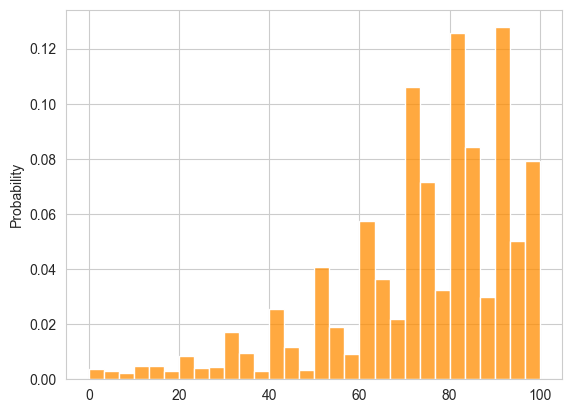

In [15]:
sns.histplot(np.hstack(conversationalist_score),stat="probability", color="darkorange")

In [31]:
avg_score = np.nanmean(conversationalist_score, axis=1) ##two people to one

/var/folders/5m/4tj5fx915fv1z073c22c2q7m0000gn/T/ipykernel_7243/1887345438.py:1: RuntimeWarning: Mean of empty slice
  avg_score = np.nanmean(conversationalist_score, axis=1) ##two people to one


In [36]:
avg_score_nonan = avg_score[~np.isnan(avg_score)]
print(avg_score_nonan.shape)

(1654,)


[False  True]


<Axes: ylabel='Probability'>

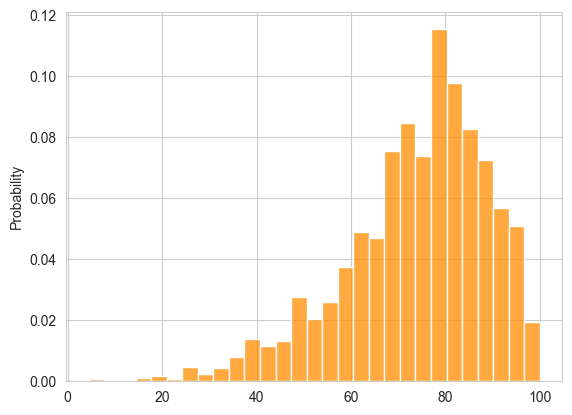

In [37]:
sns.histplot(avg_score_nonan,stat="probability", color="darkorange")

In [39]:
print(np.percentile(avg_score_nonan,25))

65.5


In [38]:
print(np.percentile(avg_score_nonan,75))

85.0


In [41]:
preaffect_list = []
affect_list = []
prearousal_list = []
arousal_list = []
for i, survey in enumerate(notebook.tqdm(survey_list)):
    if ((np.mean(survey["conversationalist"]) >= 85) or (np.mean(survey["conversationalist"]) <= 65.5)):
        preaffect_list.append(survey["pre_affect"])
        affect_list.append(survey["affect"])
        prearousal_list.append(survey["pre_arousal"])
        arousal_list.append(survey["arousal"])

  0%|          | 0/1656 [00:00<?, ?it/s]

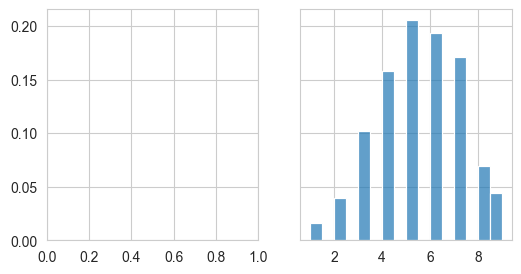

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3), sharey=True)
sns.histplot(np.hstack(prearousal_list), alpha=0.7, stat="probability", ax=ax[1])
ax[0].hist(np.hstack(arousal_list), alpha=0.7, density=True)
ax[0].legend(["prearousal", "arousal"])
ax[1].hist(np.hstack(preaffect_list), alpha=0.7, density=True)
ax[1].hist(np.hstack(affect_list), alpha=0.7, density=True)
ax[1].legend(["preaffect", "affect"])
plt.show()

In [45]:
len(prearousal_list), len(arousal_list), len(preaffect_list), len(affect_list)

(854, 854, 854, 854)

In [53]:
data_dict = {'condition':
                 np.repeat(['prearousal', 'arousal', 'preaffect', 'affect'],
                           len(prearousal_list)),
             'score':
                 np.hstack((np.mean(prearousal_list, axis=1), np.mean(arousal_list, axis=1), np.mean(preaffect_list, axis=1), np.mean(affect_list, axis=1)))}
# print(data_dict)
df = pd.DataFrame(data_dict)
print(df)

       condition  score
0     prearousal    4.0
1     prearousal    4.5
2     prearousal    6.5
3     prearousal    7.5
4     prearousal    2.0
...          ...    ...
3411      affect    7.5
3412      affect    6.5
3413      affect    6.5
3414      affect    7.5
3415      affect    8.0

[3416 rows x 2 columns]


<Axes: xlabel='score', ylabel='Count'>

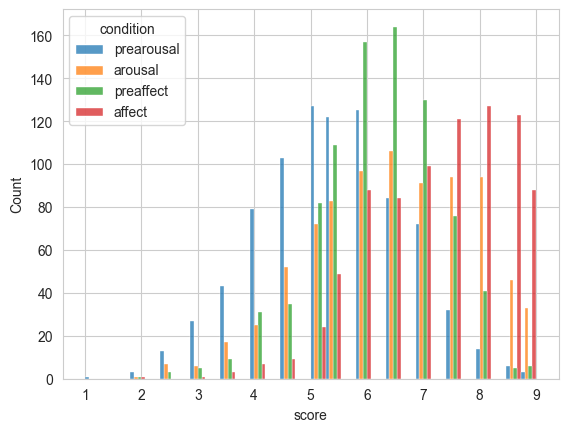

In [67]:
sns.histplot(df, x='score', hue='condition', multiple='dodge')

In [59]:
np.array(prearousal_list).shape
# print(np.mean(prearousal_list, axis=1))

(854, 2)

In [107]:
data_dict = {'Condition':
                 np.repeat(['Prearousal', 'Arousal'],
                           len(prearousal_list)),
             'Score':
                 np.hstack((np.mean(prearousal_list, axis=1), np.mean(arousal_list, axis=1)))}
# print(data_dict)
df1 = pd.DataFrame(data_dict)

In [108]:
data_dict = {'Condition':
                 np.repeat(['Preaffect', 'Affect'],
                           len(prearousal_list)),
             'Score':
                 np.hstack(( np.mean(preaffect_list, axis=1), np.mean(affect_list, axis=1)))}
# print(data_dict)
df2 = pd.DataFrame(data_dict)

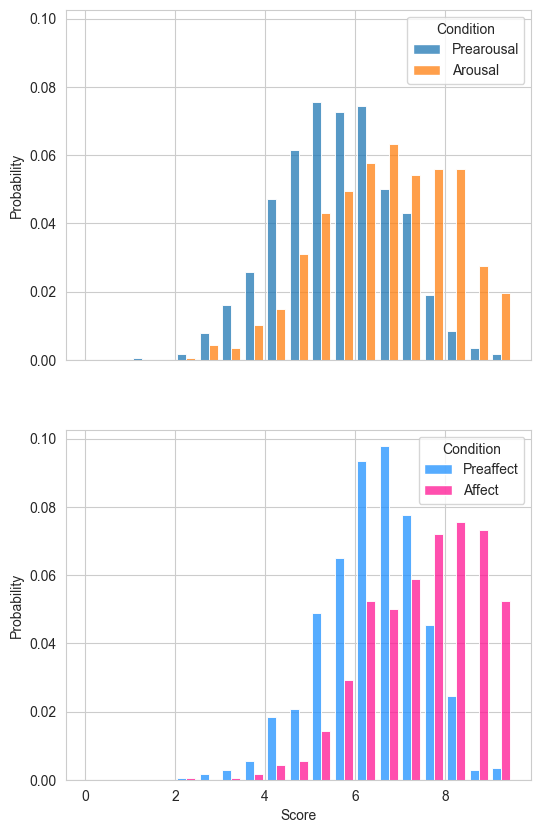

In [112]:
fig, ax = plt.subplots(2, 1, figsize=(6,10), sharex=True, sharey=True)
sns.histplot(df1, x='Score', hue='Condition', multiple='dodge', shrink=0.8, ax=ax[0], stat="probability", bins=np.arange(0,10,0.5))
sns.histplot(df2, x='Score', hue='Condition', multiple='dodge', shrink=0.8, palette=["dodgerblue","deeppink"], ax=ax[1], stat="probability", bins=np.arange(0,10,0.5))

fig.savefig("../figures/selected_Arousal&Affect.png", dpi=600)